## Step 3 - Exploring Data & Visualizing

In this step, we will Visualizing and understanding the data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv("IMDb_rating_data_after_scrubbing.csv",index_col = 0)
data.head()

,Name,Genre,Year,Imdb Rating,Director,Votes,Gross,malesRating,malesCount,femalesRating,femalesCount
0,The Dark Knight,Action,2008,9.0,Christopher Nolan,2573361,534.86,9.0,1480015,8.7,265210
1,The Lord of the Rings: The Return of the King,Action,2003,9.0,Peter Jackson,1786873,377.85,9.0,1030137,8.9,218645
2,Inception,Action,2010,8.8,Christopher Nolan,2283048,292.58,8.8,1263368,8.7,294017
3,The Lord of the Rings: The Two Towers,Action,2002,8.8,Peter Jackson,1613775,342.55,8.8,925097,8.7,202157
4,The Lord of the Rings: The Fellowship of the Ring,Action,2001,8.8,Peter Jackson,1807955,315.54,8.8,1025720,8.8,229858


In [3]:
display(data.describe().apply(lambda s: s.apply('{0:.2f}'.format)))

,Year,Imdb Rating,Votes,Gross,malesRating,malesCount,femalesRating,femalesCount
count,4691.00,4691.00,4691.00,4691.00,4691.00,4691.00,4691.00,4691.00
mean,1997.57,7.55,237881.73,76.86,7.50,138646.45,7.60,30916.20
std,21.44,0.64,307561.71,101.61,0.67,177012.99,0.60,39753.88
min,1920.00,1.90,25037.00,0.00,1.70,2582.00,2.70,110.00
25%,1989.00,7.20,49250.00,9.54,7.20,29307.50,7.30,5630.50
50%,2005.00,7.60,113143.00,53.71,7.60,67334.00,7.70,14094.00
75%,2013.00,8.00,289909.00,76.86,7.90,173077.00,8.00,39731.00
max,2022.00,9.30,2601939.00,936.66,9.30,1480017.00,9.40,294019.00


## Histogram of frequency of Imdb Rating

#### In the chart below we can see that the most common rating is in the range of 7-8

Text(0, 0.5, 'Frequency')

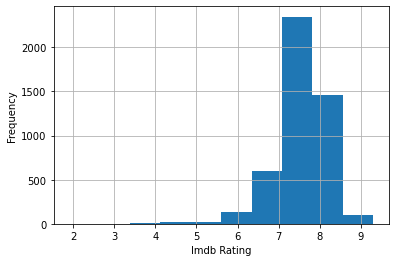

In [4]:
data['Imdb Rating'].hist(bins=10)
plt.xlabel('Imdb Rating')
plt.ylabel('Frequency')

## Histogram of frequency of male grading
 

#### In the chart below we can see that the most common rating is in the range of 7-8.5

Text(0, 0.5, 'Frequency')

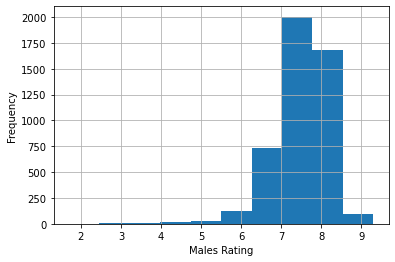

In [5]:
data['malesRating'].hist(bins=10)
plt.xlabel('Males Rating')
plt.ylabel('Frequency')

## Histogram of frequency of Females grading

#### In the chart below we can see that the most common rating is in the range of 7.5 - 8.5

Text(0, 0.5, 'Frequency')

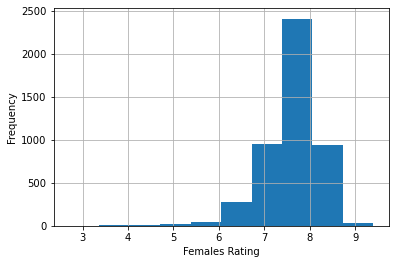

In [6]:
data['femalesRating'].hist(bins=10)
plt.xlabel('Females Rating')
plt.ylabel('Frequency')

In [7]:
## ---------------------------------------------
def plot_frequent_elements(df, df_in_params):
    fig, axes = plt.subplots(1, 2, figsize=(20,5))
    for i, row in df_in_params.iterrows():
        series = get_frequent_elements(df, row.loc['col_name'], row.loc['Genre'])
        one_dim_plot(series, row.loc['plot_type'], axes[i])
## ---------------------------------------------        
def get_frequent_elements(df, col_name, num_top_elements):
    temp_df = df.copy()
    series = temp_df[col_name].value_counts()[:num_top_elements].sort_index(ascending=True)
    return series
## ---------------------------------------------
def one_dim_plot(sr, plot_type, axis):
    sr.plot(kind=plot_type,ax=axis)
## ---------------------------------------------

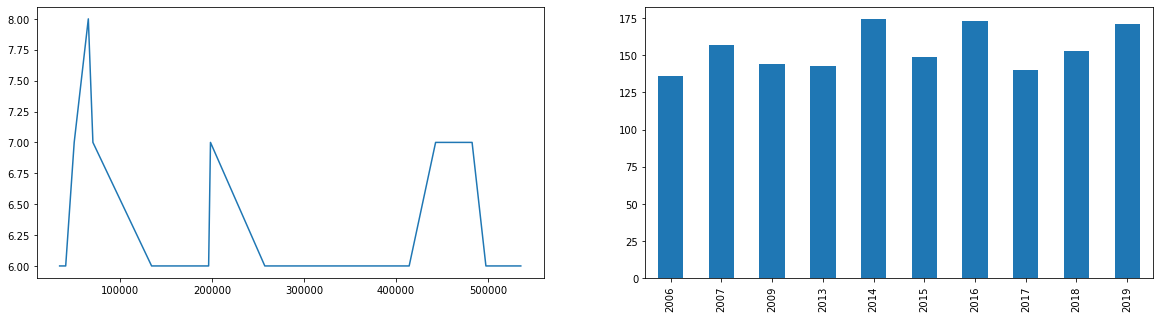

In [8]:
df_params = pd.DataFrame({'plot_type': ['line', 'bar'], 'col_name': ['Votes', 'Year'],'Genre': [20,10]})
plot_frequent_elements(data, df_params)

In [9]:
print ("Crosstab by Genre & Imdb Rating")
ct1 = pd.crosstab(data['Genre'],data['Imdb Rating'])
ct1

Crosstab by Genre & Imdb Rating


Imdb Rating,1.9,2.6,2.8,3.1,3.5,3.8,4.2,4.3,4.4,4.5,...,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9.0,9.2,9.3
Genre,,,,,,,,,,,,,,,,,,,,,
Action,0,0,0,0,0,0,0,0,0,0,...,6,8,5,5,2,3,0,2,0,0
Adventure,0,0,0,0,0,0,0,0,0,0,...,10,8,3,3,1,4,0,1,0,0
Animation,0,0,0,0,0,0,0,0,0,0,...,3,5,2,1,0,0,0,0,0,0
Biography,0,0,0,0,0,0,0,0,0,0,...,3,4,3,0,1,0,0,1,0,0
Comedy,0,0,0,0,0,0,0,0,0,0,...,10,5,5,1,0,0,0,0,0,1
Crime,0,0,0,0,0,0,0,0,0,0,...,12,4,7,4,1,0,2,4,1,0
Drama,0,0,0,0,0,0,0,0,0,0,...,31,24,20,11,3,4,2,5,1,2
Family,0,0,0,0,0,0,0,0,0,0,...,5,3,1,2,0,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,0,0,...,5,4,0,4,1,2,0,1,0,0


In [10]:
print ("Crosstab by Genre & malesRating")
ct2 = pd.crosstab(data['Genre'],data['malesRating'])
ct2

Crosstab by Genre & malesRating


malesRating,1.7,2.5,2.8,3.1,3.4,3.6,3.7,3.8,3.9,4.1,...,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9.0,9.2,9.3
Genre,,,,,,,,,,,,,,,,,,,,,
Action,0,0,0,0,0,0,1,0,0,0,...,9,4,3,4,1,5,0,2,0,0
Adventure,0,0,0,0,0,0,0,0,0,0,...,12,4,2,4,0,4,1,1,0,0
Animation,0,0,0,0,0,0,0,0,0,0,...,6,2,2,0,0,0,0,0,0,0
Biography,0,0,0,0,0,0,0,0,0,0,...,4,1,2,0,1,0,0,1,0,0
Comedy,0,0,0,0,0,0,0,0,0,0,...,10,2,4,2,0,0,0,0,1,0
Crime,0,0,0,0,0,0,0,0,0,0,...,12,4,4,3,2,1,0,4,1,0
Drama,0,0,0,0,0,0,0,0,0,0,...,34,17,16,8,5,4,0,6,2,1
Family,0,0,0,0,0,0,0,0,0,0,...,5,2,1,1,0,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,0,0,...,7,0,1,3,0,3,0,1,0,0


In [11]:
print ("Crosstab by Genre & femalesRating")
ct3 = pd.crosstab(data['Genre'],data['femalesRating'])
ct3

Crosstab by Genre & femalesRating


femalesRating,2.7,3.3,3.5,3.7,3.9,4.2,4.7,4.8,4.9,5.0,...,8.4,8.5,8.6,8.7,8.8,8.9,9.0,9.1,9.3,9.4
Genre,,,,,,,,,,,,,,,,,,,,,
Action,0,0,0,0,1,0,0,0,0,0,...,7,5,1,4,1,1,0,0,0,0
Adventure,0,0,0,0,0,0,0,0,0,0,...,12,6,2,3,2,1,0,0,0,0
Animation,0,0,0,0,0,0,0,0,0,0,...,8,2,4,1,1,0,0,0,0,0
Biography,0,0,0,0,0,0,0,0,0,0,...,8,0,1,2,0,1,1,0,0,0
Comedy,0,0,0,0,0,0,0,0,0,0,...,15,5,1,1,0,1,0,0,0,1
Crime,0,0,0,0,0,0,0,0,0,0,...,7,3,3,2,1,3,0,0,0,0
Drama,0,0,0,0,0,0,0,0,0,0,...,29,12,9,10,3,5,1,1,1,1
Family,0,0,0,0,0,0,0,0,0,0,...,11,3,4,1,1,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,0,0,...,8,4,4,3,1,1,0,0,0,0


In [13]:
#---------------------------
def plot_high_correlated_scatters(df):
    correlations, tuple_arr = get_highly_correlated_cols(df)
    fig, ax = plt.subplots(1, len(correlations), figsize=(20,5))

    indx_sort = np.argsort(correlations)
    for i, n_correlation in enumerate(indx_sort): 
        col_lt, col_rt = tuple_arr[n_correlation]
        col_lt_name = df.columns[tuple_arr[i][0]]
        col_rt_name = df.columns[tuple_arr[i][1]]
        title = "corr('%s', '%s')=%4.2f" %(col_lt_name, col_rt_name, correlations[n_correlation])
        sns.regplot(x=df.columns[tuple_arr[i][0]], y=df.columns[tuple_arr[i][1]], data=df, ax=ax[i], fit_reg=False).set_title(title)
#---------------------------
def get_highly_correlated_cols(df):
    correlatedColumns = []
    corr = df.corr(method='pearson')
    print (corr)
    indices = corr.index
    columns = corr.columns
    posthreshold = 0.5
        
    for cInd, c in enumerate(columns):
        for rInd, r in enumerate(indices):
            if (c != r) and (corr[c][r] > posthreshold) and (not is_in_array(correlatedColumns, cInd, rInd)):
                correlatedColumns.append({"column" : cInd , "row" : rInd , "val" :corr[c][r] })

    correlations = []
    tuple_arr = []
    for item in correlatedColumns:
        correlations.append(item["val"])
        my_tuple = item["column"], item["row"]
        tuple_arr.append(my_tuple)
    return correlations, tuple_arr
#---------------------------
def is_in_array(correlatedColumns, c, r):
    for item in correlatedColumns:
        if (item["column"] == c and item["row"] == r) or (item["row"] == r and item["column"] == c) or (item["column"] == r and item["row"] == c) or (item["row"] == c and item["column"] == r):
            return True
    return False
#---------------------------

               Imdb Rating  malesRating  femalesRating
Imdb Rating       1.000000     0.980908       0.901784
malesRating       0.980908     1.000000       0.897123
femalesRating     0.901784     0.897123       1.000000


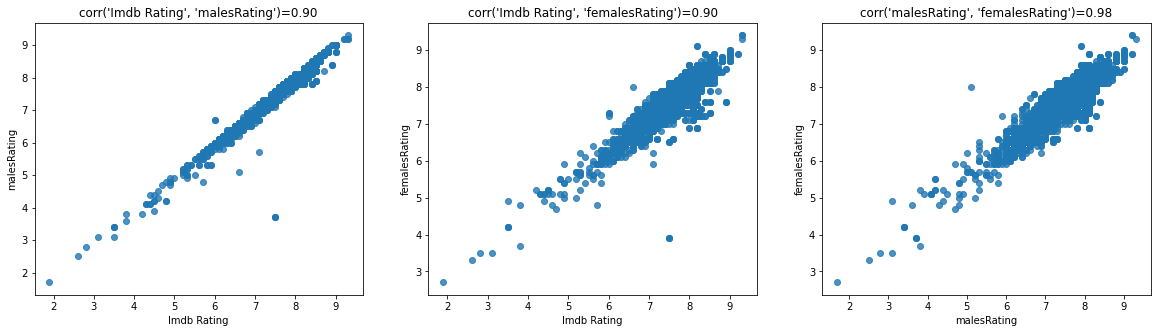

In [14]:
cols_for_correlations = ['Imdb Rating', 'malesRating', 'femalesRating']
plot_high_correlated_scatters(data[cols_for_correlations])

In [30]:
data_ratePerGenre = []
genres = data["Genre"].drop_duplicates(inplace=False).reset_index(drop=True)
genres

df_ByGenre = pd.DataFrame(data, 
                columns =["Genre",'malesRating', 'femalesRating'])
df_ByGenre.set_index("Genre", inplace = True)

for genre in genres:
    tempPerGenre = df_ByGenre.loc[[genre]]
    tempMeanOfMales = round(tempPerGenre["malesRating"].mean(), 2)
    tempMeanOfFemales = round(tempPerGenre["femalesRating"].mean(), 2)
    data_ratePerGenre.append({"Genre":genre, "Avg of Males": tempMeanOfMales, "Avg of Females":tempMeanOfFemales})

print ("Table of Avgs per Genre")
    
df_ratePerGenre = pd.DataFrame(data_ratePerGenre)
df_ratePerGenre.set_index('Genre', inplace = True)
df_ratePerGenre

Table of Avgs per Genre


,Avg of Males,Avg of Females
Genre,,
Action,7.84,7.78
Adventure,7.82,7.89
Animation,7.26,7.51
Biography,7.55,7.69
Comedy,7.87,7.91
Crime,7.89,7.83
Drama,8.24,8.17
Family,7.37,7.67
Fantasy,7.55,7.74


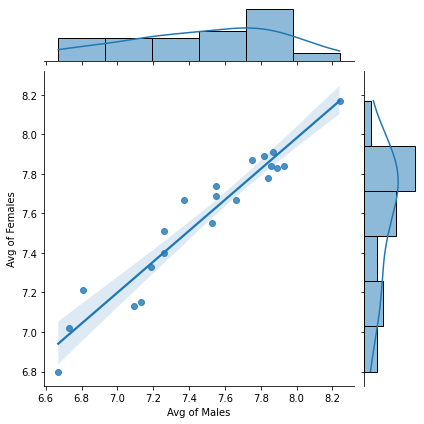

In [31]:
sns.jointplot(x="Avg of Males", y="Avg of Females", data=df_ratePerGenre, kind="reg");

In [16]:
data_ratePerGenre = []
genres = data["Genre"].drop_duplicates(inplace=False).reset_index(drop=True)
genres

df_ByGenre = pd.DataFrame(data, 
                columns =["Genre",'malesCount', 'femalesCount'])
df_ByGenre.set_index("Genre", inplace = True)


for genre in genres:
    tempPerGenre = df_ByGenre.loc[[genre]]
    tempMeanOfMales = round(tempPerGenre["malesCount"].values.mean(), 2)
    tempMeanOfFemales = round(tempPerGenre["femalesCount"].values.mean(), 2)
    data_ratePerGenre.append({"Genre":genre, "Avg of count vote males": tempMeanOfMales, "Avg of count vote females":tempMeanOfFemales})

print ("Table of Avgs vote per Genre")
    
df_ratePerGenre = pd.DataFrame(data_ratePerGenre)
df_ratePerGenre.set_index('Genre', inplace = True)
df_ratePerGenre

Table of Avgs vote per Genre


,Avg of count vote males,Avg of count vote females
Genre,,
Action,238837.22,40426.64
Adventure,235121.04,51738.41
Animation,99023.19,31461.83
Biography,103541.59,23033.92
Comedy,143728.56,35590.70
Crime,175078.50,29985.66
Drama,258954.82,51538.27
Family,111934.52,37849.74
Fantasy,153281.76,42922.82


Comparison of averages by genre


Text(0, 0.5, 'Rating')

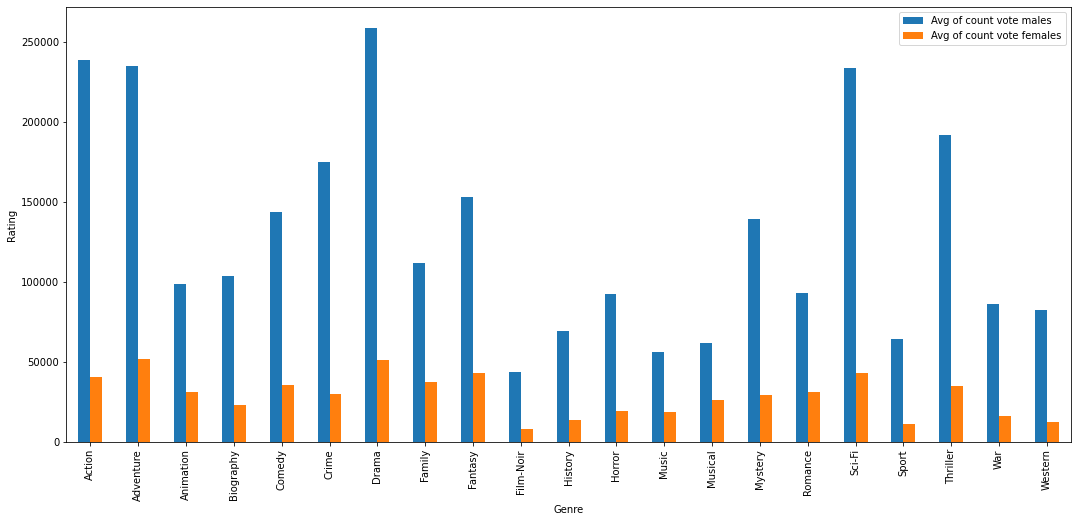

In [17]:
print ("Comparison of averages by genre")import pandas as pd

data = pd.read_csv(r"C:\Users\Administrator\Desktop\IMDb_rating_data_after_scrubbing.csv",index_col=0)

#TODO: remove directors with less than 5 movies, put them into category "Other"
#TODO: try to find other interesting features from the movie name, how many words, specific words that women\men like

data['Name length'] = data.Name.str.len()

data['Age'] = 2022 - data["Year"]
y = data["malesCount"]/data["femalesCount"]
cols = ['Genre',"Gross","Year","Age","Director","Name length"] #,"Director"
data = data[cols]
data = pd.get_dummies(data,columns=['Genre',"Director"])

#split to train and test, also create the target variable, the ratio of how many women\men will watch
X_train = data[data.Year<2015]
X_test = data[data.Year>=2015]
y_train = y[data.Year<2015]
y_train.hist() #print histogram. if it is not printing do: "from matplotlib import pyplot as plt;plt.show()
y_test = y[data.Year>=2015]
del X_train['Year'] #will not help us, we split data by year
del X_test['Year']
from xgboost import XGBRegressor #to install, pip install xgboost
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
for name,clf in [('xgboost',XGBRegressor()),
                 ("Linear regression",LinearRegression()), #right now it is not fair to test this model, you must first remove the directors, there are too many.
                 ("KNN",KNeighborsRegressor()),
                 ("RF",RandomForestRegressor())]:
    clf.fit(X_train,y_train)
    pred = clf.predict(X_test)
    score = mean_absolute_error(y_test,pred)
    print('MAE for',name,'is',score)
    print("MSE",mean_squared_error(y_test,pred))


#final model:
clf = XGBRegressor().fit(X_train,y_train)

#explain model, read more about it here: https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/tree_based_models/Census%20income%20classification%20with%20XGBoost.html
import shap #to install, pip install shap
explainer = shap.TreeExplainer(clf)
shap_values =explainer.shap_values(X_test)
shap.summary_plot(shap_values,X_test)
#most important features, groos,age, action movies (for men), family movies (for women)
df_ratePerGenre.plot(kind='bar',figsize=(18,8))
plt.xlabel('Genre')
plt.ylabel('Rating')

Comparison of averages by genre


Text(0, 0.5, 'Rating')

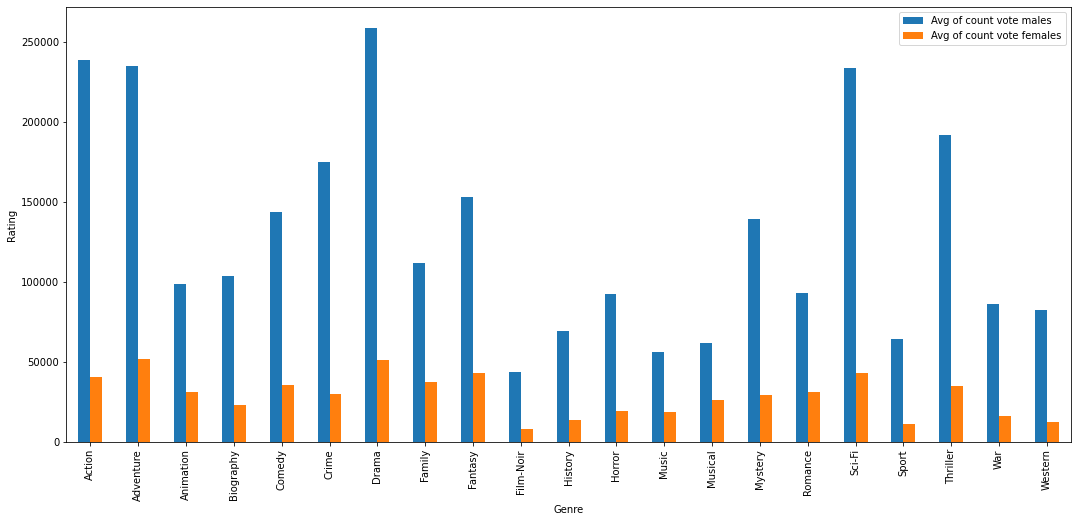

In [19]:
print ("Comparison of averages by genre")
df_ratePerGenre.plot(kind='bar',figsize=(18,8))
plt.xlabel('Genre')
plt.ylabel('Rating')

Text(0, 0.5, 'Rating')

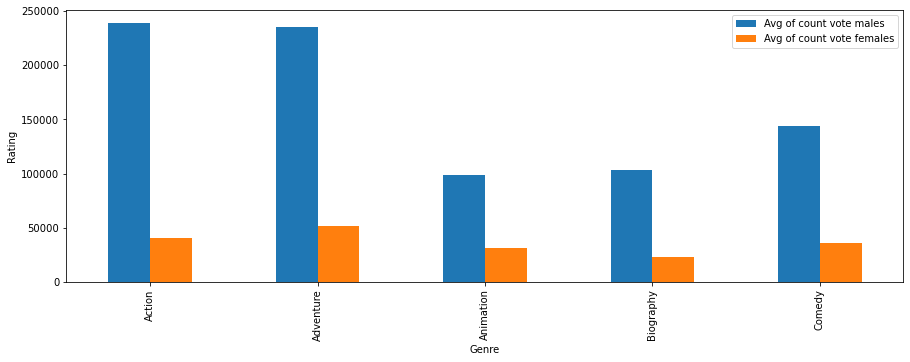

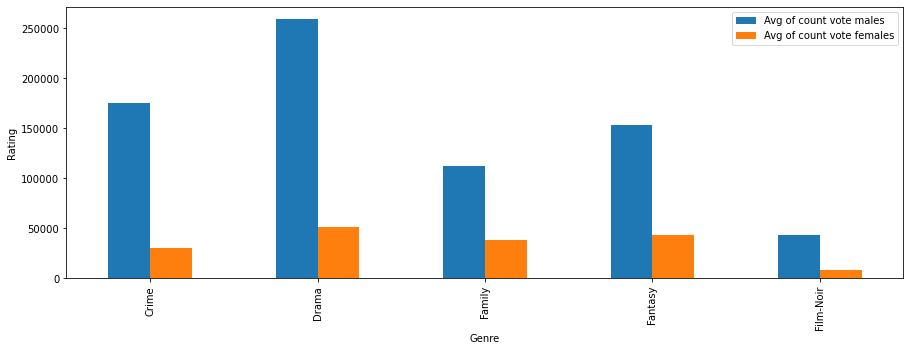

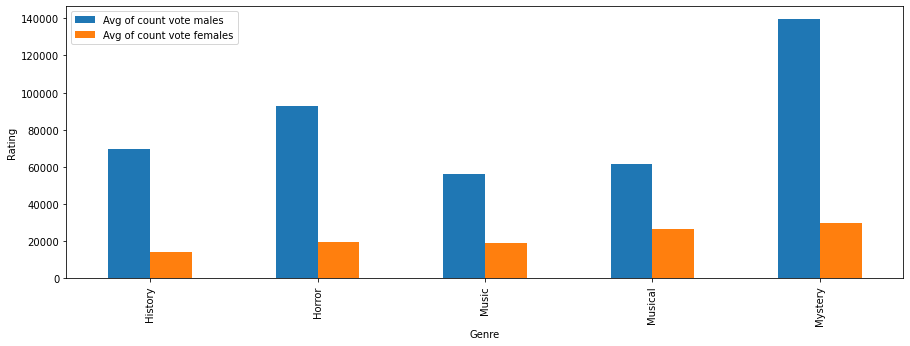

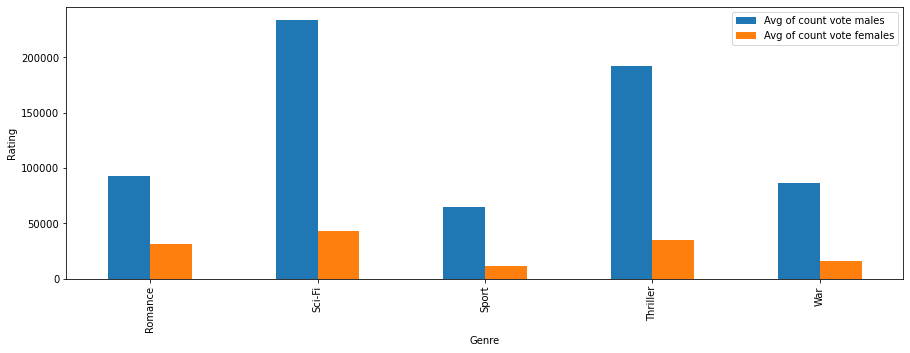

In [20]:
df_ratePerGenre[:5].plot(kind='bar',figsize=(15,5))
plt.xlabel('Genre')
plt.ylabel('Rating')
df_ratePerGenre[5:10].plot(kind='bar',figsize=(15,5))
plt.xlabel('Genre')
plt.ylabel('Rating')
df_ratePerGenre[10:15].plot(kind='bar',figsize=(15,5))
plt.xlabel('Genre')
plt.ylabel('Rating')
df_ratePerGenre[15:20].plot(kind='bar',figsize=(15,5))
plt.xlabel('Genre')
plt.ylabel('Rating')

In [23]:
data.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Votes,Gross,malesRating,malesCount,femalesRating,femalesCount
count,4691.00,4691.00,4691.00,4691.00,4691.00,4691.00
mean,237881.73,76.86,7.50,138646.45,7.60,30916.20
std,307561.71,101.61,0.67,177012.99,0.60,39753.88
min,25037.00,0.00,1.70,2582.00,2.70,110.00
25%,49250.00,9.54,7.20,29307.50,7.30,5630.50
50%,113143.00,53.71,7.60,67334.00,7.70,14094.00
75%,289909.00,76.86,7.90,173077.00,8.00,39731.00
max,2601939.00,936.66,9.30,1480017.00,9.40,294019.00


### in this histogram we can check correlation between columns

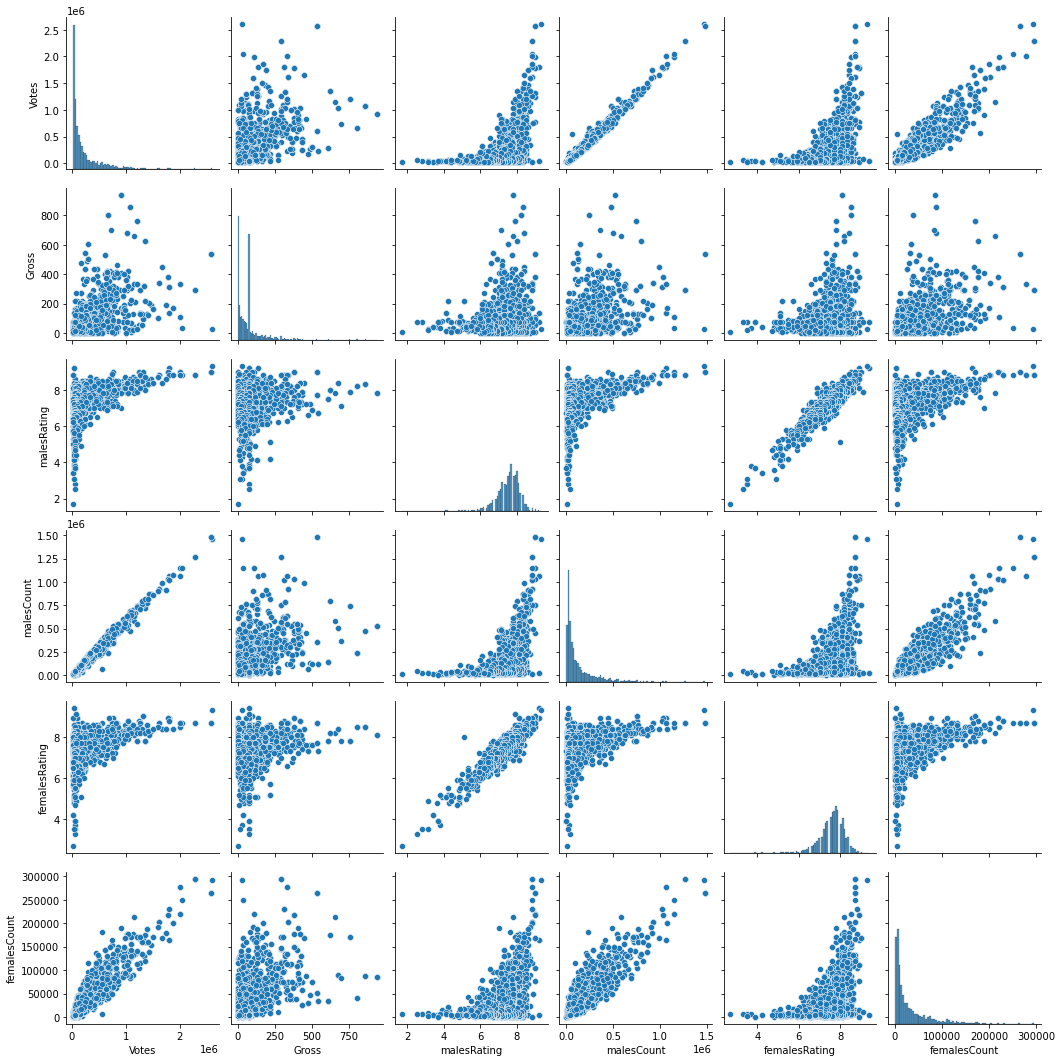

In [25]:
sns.pairplot(data)

### In this table, we can more accurately identify the dependencies between the variables

In [27]:
data.corr()

,Votes,Gross,malesRating,malesCount,femalesRating,femalesCount
Votes,1.000000,0.550743,0.427631,0.992728,0.408266,0.934612
Gross,0.550743,1.000000,0.098811,0.512214,0.166244,0.556168
malesRating,0.427631,0.098811,1.000000,0.432233,0.897123,0.352497
malesCount,0.992728,0.512214,0.432233,1.000000,0.391934,0.909525
femalesRating,0.408266,0.166244,0.897123,0.391934,1.000000,0.411257
femalesCount,0.934612,0.556168,0.352497,0.909525,0.411257,1.000000


# קוד של גיא

In [ ]:
#TODO: remove directors with less than 5 movies, put them into category "Other"
#TODO: try to find other interesting features from the movie name, how many words, specific words that women\men like
data = pd.read_csv("IMDb_rating_data_after_scrubbing.csv",index_col = 0)

data['Name length'] = data.Name.str.len()#new feature, add number of words


dirc = data.Director.value_counts()
data.loc[dirc[dirc<5],'Director'] = 'Other'

data['Age'] = 2022 - data["Year"]
y = data["malesCount"]/data["femalesCount"] ################################
cols = ['Genre',"Gross","Year","Age","Name length",'Director'] #,"Director"
data = data[cols] #selecting only the features we want
data = pd.get_dummies(data,columns=['Genre','Director']) #convert categorical features to one-hot vectors

#split to train and test, also create the target variable, the ratio of how many women\men will watch
X_train = data[data.Year<2015]
X_test = data[data.Year>=2015] #retrospective
y_train = y[data.Year<2015]
y_train.hist() #print histogram. if it is not printing do: "from matplotlib import pyplot as plt;plt.show()
y_test = y[data.Year>=2015]
del X_train['Year'] #will not help us, we split data by year
del X_test['Year']
from xgboost import XGBRegressor #to install, pip install xgboost
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
for name,clf in [('xgboost',XGBRegressor()),
                 ("Linear regression",LinearRegression()), #right now it is not fair to test this model, you must first remove the directors, there are too many.
                 ("KNN",KNeighborsRegressor()),
                 ("RF",RandomForestRegressor())]:
    clf.fit(X_train,y_train)
    pred = clf.predict(X_test)
    score = mean_absolute_error(y_test,pred)
    print('MAE for',name,'is',score)
    score = mean_absolute_error(y_train,clf.predict(X_train))
    print('MAE train for',name,'is',score)


#final model:
clf = XGBRegressor().fit(X_train,y_train)

#explain model, read more about it here: https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/tree_based_models/Census%20income%20classification%20with%20XGBoost.html
import shap #to install, pip install shap
explainer = shap.TreeExplainer(clf)
shap_values =explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")
# shap.summary_plot(shap_values,X_test)
#most important features, groos,age, action movies (for men), family movies (for women)

MAE for xgboost is 2.7370903416366064
MAE train for xgboost is 1.3204079139630713
MAE for Linear regression is 622107847.99521
MAE train for Linear regression is 0.8729615148787221
MAE for KNN is 3.599462418202967
MAE train for KNN is 1.5365017490701525


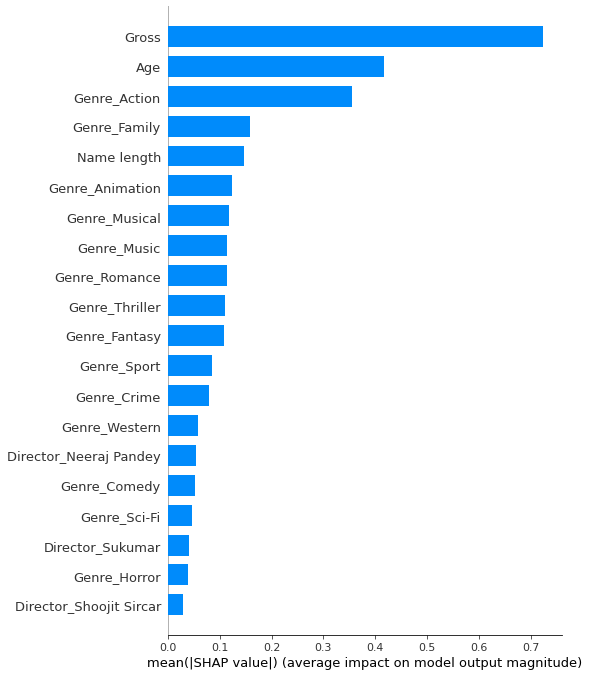

In [46]:
data = pd.read_csv("IMDb_rating_data_after_scrubbing.csv",index_col = 0)
data.Director.value_counts()

Steven Spielberg      49
Alfred Hitchcock      45
Hayao Miyazaki        44
Clint Eastwood        35
Ron Clements          35
                      ..
Ben Lewin              1
Colm McCarthy          1
Christopher Landon     1
Sergio G. Sánchez      1
Seth MacFarlane        1
Name: Director, Length: 1208, dtype: int64

In [41]:
!pip install xgboost

In [50]:
!pip install shap

In [43]:
data

,Gross,Year,Age,Name length,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Biography,Genre_Comedy,Genre_Crime,...,Director_Yorgos Lanthimos,Director_Yoshiaki Kawajiri,Director_Yoshifumi Kondô,Director_Yôjirô Takita,Director_Zack Snyder,Director_Zaza Urushadze,Director_Zoya Akhtar,Director_Éric Lartigau,Director_Ömer Faruk Sorak,Director_Ömer Vargi
0,534.86,2008,14,15,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,377.85,2003,19,45,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,292.58,2010,12,9,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,342.55,2002,20,37,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,315.54,2001,21,49,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4686,76.86,2006,16,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4687,50.70,2017,5,14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4688,113.81,1999,23,14,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4689,76.86,2015,7,16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
data

,Name,Genre,Year,Imdb Rating,Director,Votes,Gross,malesRating,malesCount,femalesRating,femalesCount
0,The Dark Knight,Action,2008,9.0,Christopher Nolan,2573361,534.86,9.0,1480015,8.7,265210
1,The Lord of the Rings: The Return of the King,Action,2003,9.0,Other,1786873,377.85,9.0,1030137,8.9,218645
2,Inception,Action,2010,8.8,Other,2283048,292.58,8.8,1263368,8.7,294017
3,The Lord of the Rings: The Two Towers,Action,2002,8.8,Other,1613775,342.55,8.8,925097,8.7,202157
4,The Lord of the Rings: The Fellowship of the Ring,Action,2001,8.8,Other,1807955,315.54,8.8,1025720,8.8,229858
...,...,...,...,...,...,...,...,...,...,...,...
4686,Bandidas,Western,2006,5.7,Joachim Rønning,35548,76.86,5.6,24259,5.9,5058
4687,The Dark Tower,Western,2017,5.6,Nikolaj Arcel,137688,50.70,5.5,85904,5.9,15506
4688,Wild Wild West,Western,1999,4.9,Barry Sonnenfeld,160516,113.81,4.9,109780,5.1,16453
4689,The Ridiculous 6,Western,2015,4.8,Frank Coraci,48957,76.86,4.8,31476,5.1,4110
